# Image Classification Using CNN
#### By The Computer Vision and Intelligence Club (CVI) - IIT Madras



<a href="https://colab.research.google.com/github/iitmcvg/CVI-Project-apps/blob/master/CVI_PS_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This aim of this Problem Statement is to introduce Deep Learning, which is one of the most used techniques for Computer Vision Application. 
Before beginning go thorugh the following articles:
1. https://www.nature.com/articles/nature14539 : It is fairly easy to follow and provides an excellent overview of the field. (You will need to login with smail to download the pdf.) 

2. http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/ : A short introduction to Multi-layer perceptrons.

3. https://cs231n.github.io/convolutional-networks/ : Introduction to Convolutional Neural Networks. CNNs are generally used for computer vision problems.


This introduction should be sufficient to get you started with this problem statement. If after going through the PS, you guys are interested in further exploring the field, I would suggest the following resources:
1. http://cs231n.stanford.edu/ : Online course by Stanford.
2. http://introtodeeplearning.com/: Video Lectures from MIT
3. https://www.deeplearningbook.org/: Most popular book on Deep Learning


We'll build a CNN using Keras to use it to classify thousands of pictures in 6 different categories.

Sounds like a huge task, but do not worry! Remember to use Google freely to search for any doubts, errors or documentation. This assignment is not only to check your DL skills, but also how you can step up to learn new things on the go using publicly available sources.

Ideally at the end, we expect that you understand the code in EVERY cell

Enter your code between areas surrounded by the following comment design
######### YOUR CODE HERE #########


################################

[Link For The Dataset](https://drive.google.com/uc?id=1Qc66kVqetwJIK7cKXnXxbPJy6gnpRSRI)

The aim of this get you all familiarized with Deep Learning in TensorFlow, a very popular Deep Learning Library (or in general GPU computation library).

Some of the dataloading and preprocessing work has been done, and you guys are expected to fill-in code where you are asked to. 

Before diving into the code ensure that you copy the notebook to your drive (See the option in File Tab) and that the Runtime Type is set to GPU (Runtime tab -> Change runtime type). To see the importance of GPU in deep learning see [this](https://course.fast.ai/gpu_tutorial.html) short article.




First we import the necessary libraries. We recommend that you check out what these libraries are if they seem unfamiliar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

# Downloading the Data and Extracting it

In [ ]:
!gdown https://drive.google.com/uc?id=1Qc66kVqetwJIK7cKXnXxbPJy6gnpRSRI
!unzip The_Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

Now define the paths to the train test and pred folders

In [ ]:
######### YOUR CODE HERE #########
trainpath = '/content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/'
testpath = '/content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_test/'
predpath = '/content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_pred/'

##################################

# Data Loading


Now let's first check the Train folder to have a look to its content

In [ ]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


ModuleNotFoundError: ignored

Ok, how about the test folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/MyDrive/cvi_project_data.rar" "/content/drive/MyDrive/cvi_dataset_final"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/seg_train/mountain/7551.jpg      80%  OK 
Extracting  /content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/seg_train/mountain/7560.jpg      80%  OK 
Extracting  /content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/seg_train/mountain/7565.jpg      80%  OK 
Extracting  /content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/seg_train/mountain/7578.jpg      80%  OK 
Extracting  /content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/seg_train/mountain/7581.jpg      80%  OK 
Extracting  /content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/seg_train/mountain/7586.jpg      80%  OK 
Extracting  /content/drive/MyDrive/cvi_dataset_final/cvi_project_data/seg_train/seg_train/mountain/7647.jpg      80%  OK 
Extracting  /content/drive/MyDri

In [ ]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street


_____
Now for prediction folder

In [ ]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


_____

# Checking Images

Now we need to check the images sizes , to know how they look like

Since we have 6 categories , we first need to create a dictionary with their names & indices. This is known as integer encoding. Also create a function to get the code back

In [ ]:
code_to_num = {'buildings':0 ,'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
num_to_code = {0:'buildings' ,1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}

def get_code(n) : 
    if n in num_to_code:
        return num_to_code[n]    

def get_num(c):
    if c in code_to_num:
        return code_to_num[c] 

Now how about the images sizes in train folder

In [ ]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

______

Ok, almost all of them are (150,150,3), how about test images ? 

In [ ]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

Almost same ratios  
Now to prediction images 

In [ ]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred//'+folder+'/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Series([], dtype: int64)

Ok , since almost all of pictures are (150,150,3) , we can use all pictures in our model, after resizing it to a particular size

# Reading Images

Now it's time to read all images & convert it into arrays

First we'll create a variable s , which refer to size , so we can change it easily 

Let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [ ]:
s = 100

Now to read all pictues in six categories in training folder, and use OpenCV to resize it. And not to forget assigning the y value from the predefined function 

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(get_num(folder))

Great , now how many items in X_train 

In [ ]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


Also we have have a look to random pictures in X_train , and to adjust their title using the y value

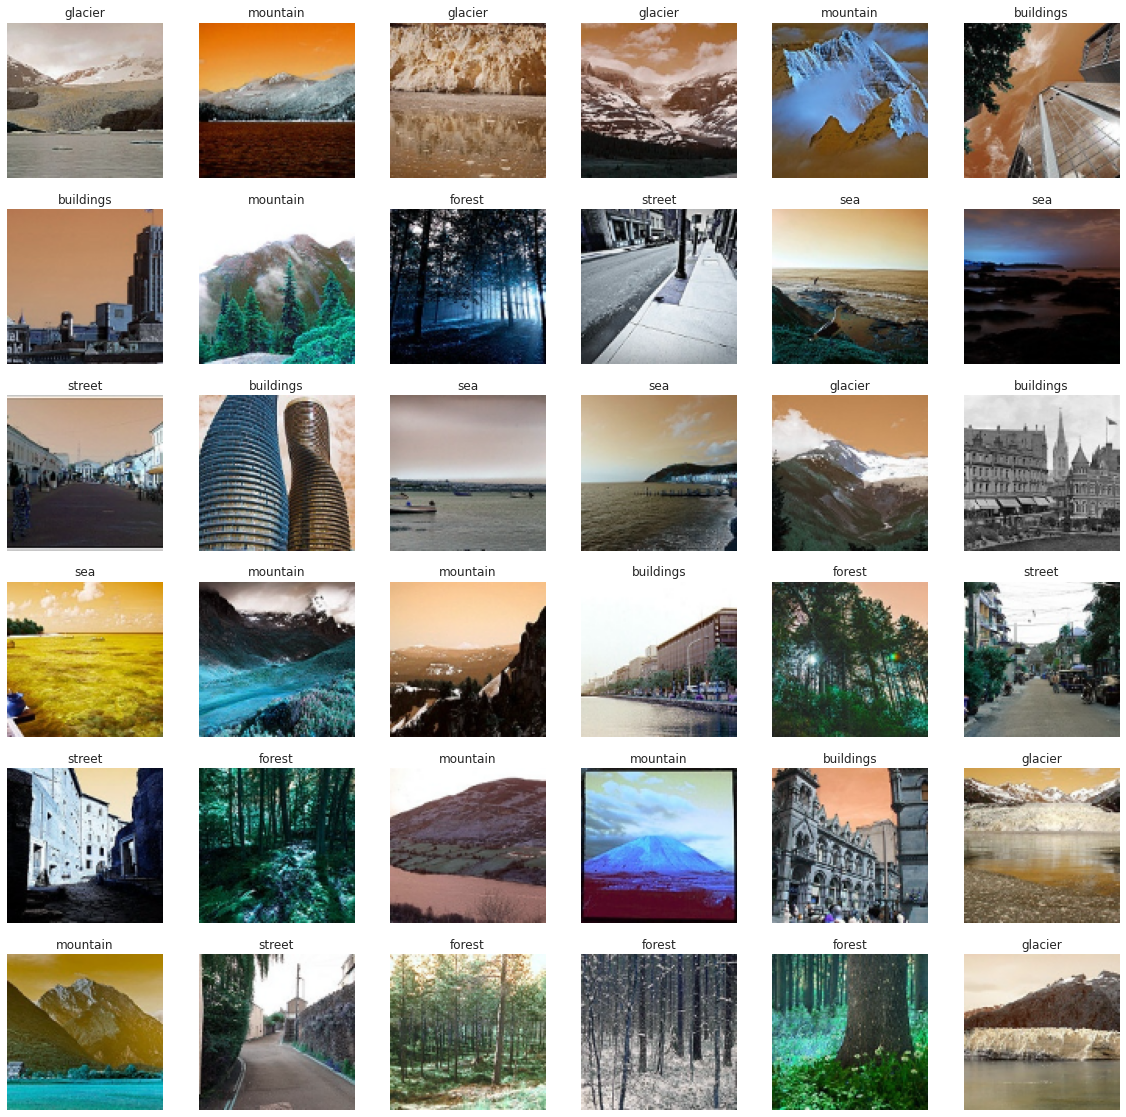

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_code(y_train[i]))

Great , now to repeat same steps exactly in test data

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(get_num(folder))
        

In [ ]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


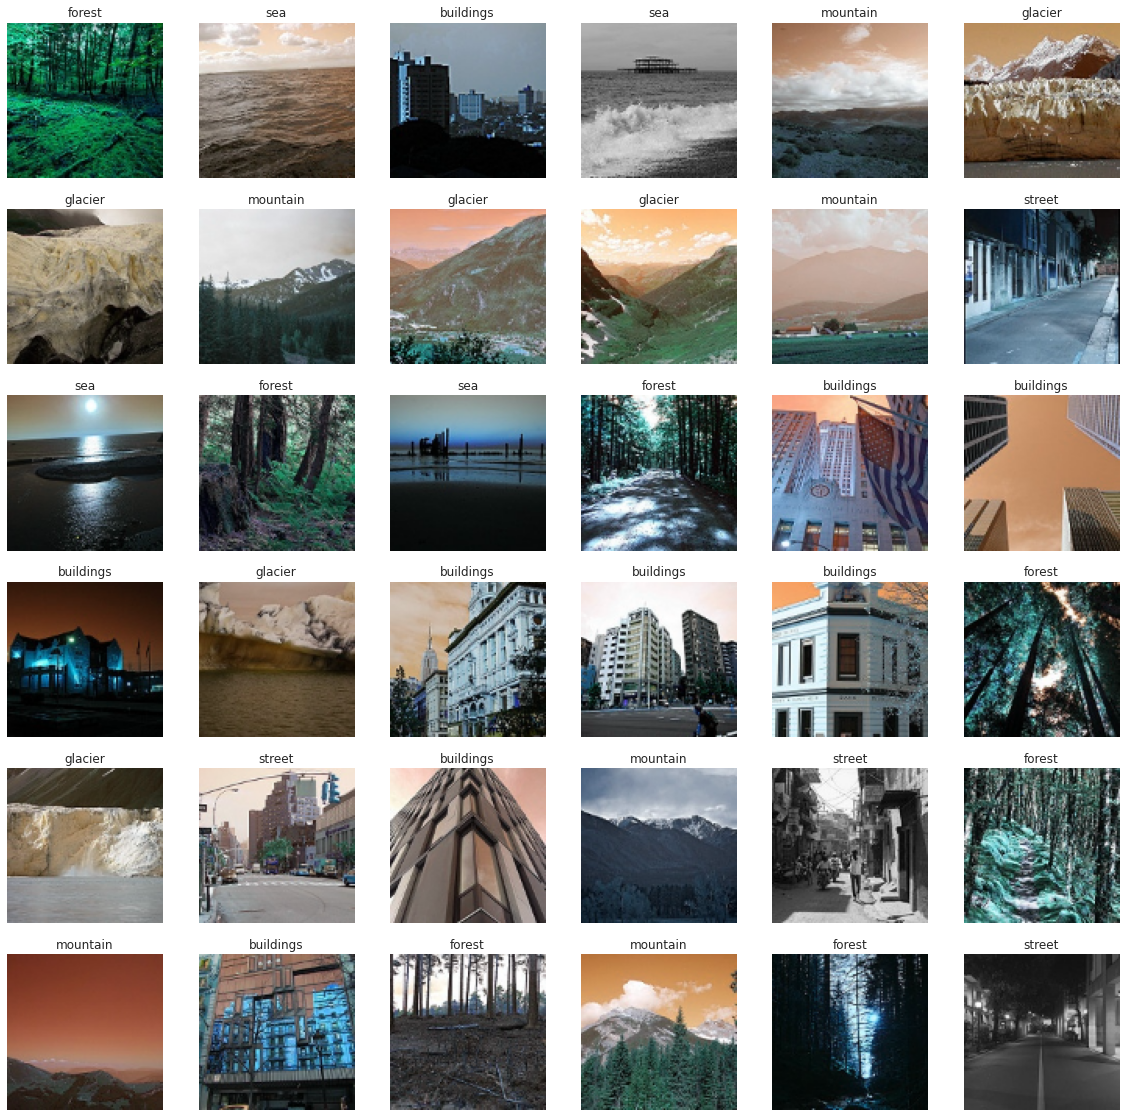

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(get_code(y_test[i]))

Also with Prediction data , without having title ofcourse

In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [ ]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


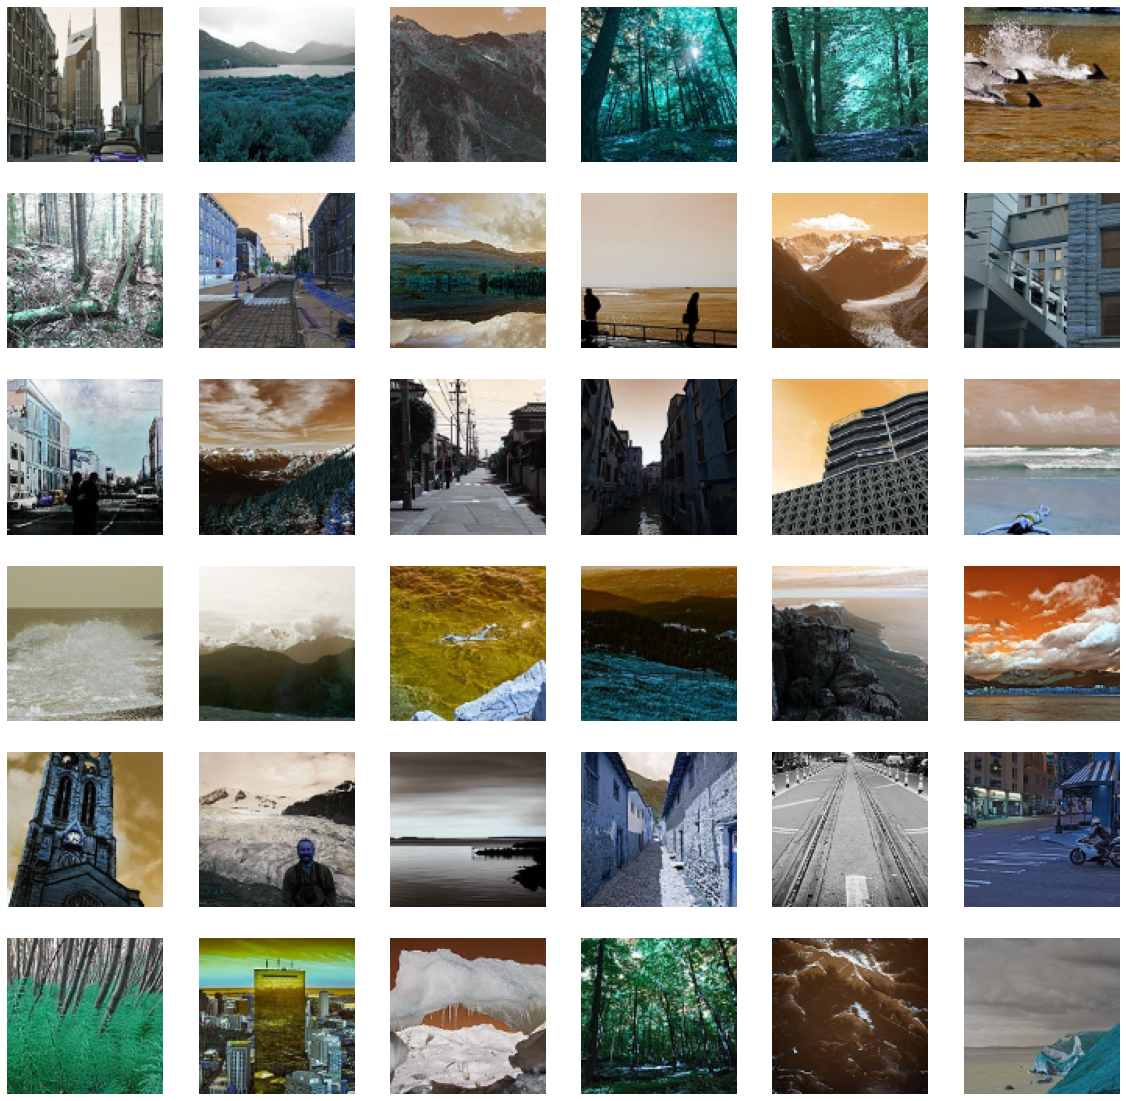

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

________

# Building The Model 

Now we need to build the model to train our data

First we convert the data into arrays using numpy

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


Now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Dropouts and Dense layer

In [ ]:
############### YOUR CODE HERE  ####################
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(6,activation='softmax'),

]


)
####################################################

In [ ]:

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform


def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure

    Parameters
    ----------
    X : tensor
        input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f : integer
        specifying the shape of the middle CONV's window for the main path
    filters : list
        python list of integers, defining the number of filters in the CONV layers of the main path
    stage : integer
        used to name the layers, depending on their position in the network
    block : str
        used to name the layers, depending on their position in the network

    Returns
    -------
    X : tensor
        output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. we'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid',
               name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same',
               name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid',
               name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X


def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Implementation of the convolutional block as defined in Figure

    Parameters
    ----------
    X : tensor
        input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f : integer
        specifying the shape of the middle CONV's window for the main path
    filters : list
        python list of integers, defining the number of filters in the CONV layers of the main path
    stage : integer
        used to name the layers, depending on their position in the network
    block : str
        used to name the layers, depending on their position in the network
    s : integer, optional
        Integer, specifying the stride to be used. The default is 2.

    Returns
    -------
    X : tensor
        output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X


def ResNet50(input_shape, outputClasses=6):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Parameters
    ----------
    input_shape : tuple, optional
        shape of the input image.
    outputClasses : integer, optional
        number of classes.

    Returns
    -------
    model : object
        a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2),padding='same')(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(outputClasses, activation='softmax', name='fc' + str(outputClasses),
              kernel_initializer=glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model


model = ResNet50(input_shape = (224,224,3))
print(model.summary())

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, 
from keras.layers import , MaxPool2D, AvgPool2D, GlobalAvgPool2D, BatchNormalization
from keras.layers import Add,  ReLU, Activation, 


In [ ]:
def resnet(input_shape, n_classes = 6):
  
  def conv_bn_rl(x, f, k=1, s=1, p='same'):
    x = Conv2D(f, k, strides=s, padding=p)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
  
  
  def identity_block(tensor, f):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, tensor])
    output = ReLU()(x)
    return output
  
  
  def conv_block(tensor, f, s):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3, s)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(4*f, 1, strides=s)(tensor)
    shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    output = ReLU()(x)
    return output
  def resnet_block(x, f, r, s=2):
    x = conv_block(x, f, s)
    for _ in range(r-1):
      x = identity_block(x, f)
    return x
    
  
  input = Input(input_shape)
  
  x = conv_bn_rl(input, 64, 7, 2)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = resnet_block(x, 64, 3, 1)
  x = resnet_block(x, 128, 4)
  x = resnet_block(x, 256, 6)
  x = resnet_block(x, 512, 3)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model
KerasModel = resnet(input_shape = (100,100,3))

Now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
KerasModel.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr= .001),metrics=['accuracy'] )

So how the model looks like ?

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 50, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 50, 50, 64)   0           batch_normalization[0][0]        
_________________________________________________________________________

Now to train the model , lets use 50 epochs now



In [ ]:
ThisModel = KerasModel.fit(X_train,y_train,epochs = 1)

439/439 [==============================] - 48s 108ms/step - loss: 0.0489 - accuracy: 0.9839


How is the final loss & accuracy?

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 3s 32ms/step - loss: 0.7459 - accuracy: 0.8533
Test Loss is 0.7459112405776978
Test Accuracy is 0.8533333539962769


In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (3000, 6)


Now it's time to predict X_Predict

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (7301, 6)


And show random redicted pictures & its predicting category

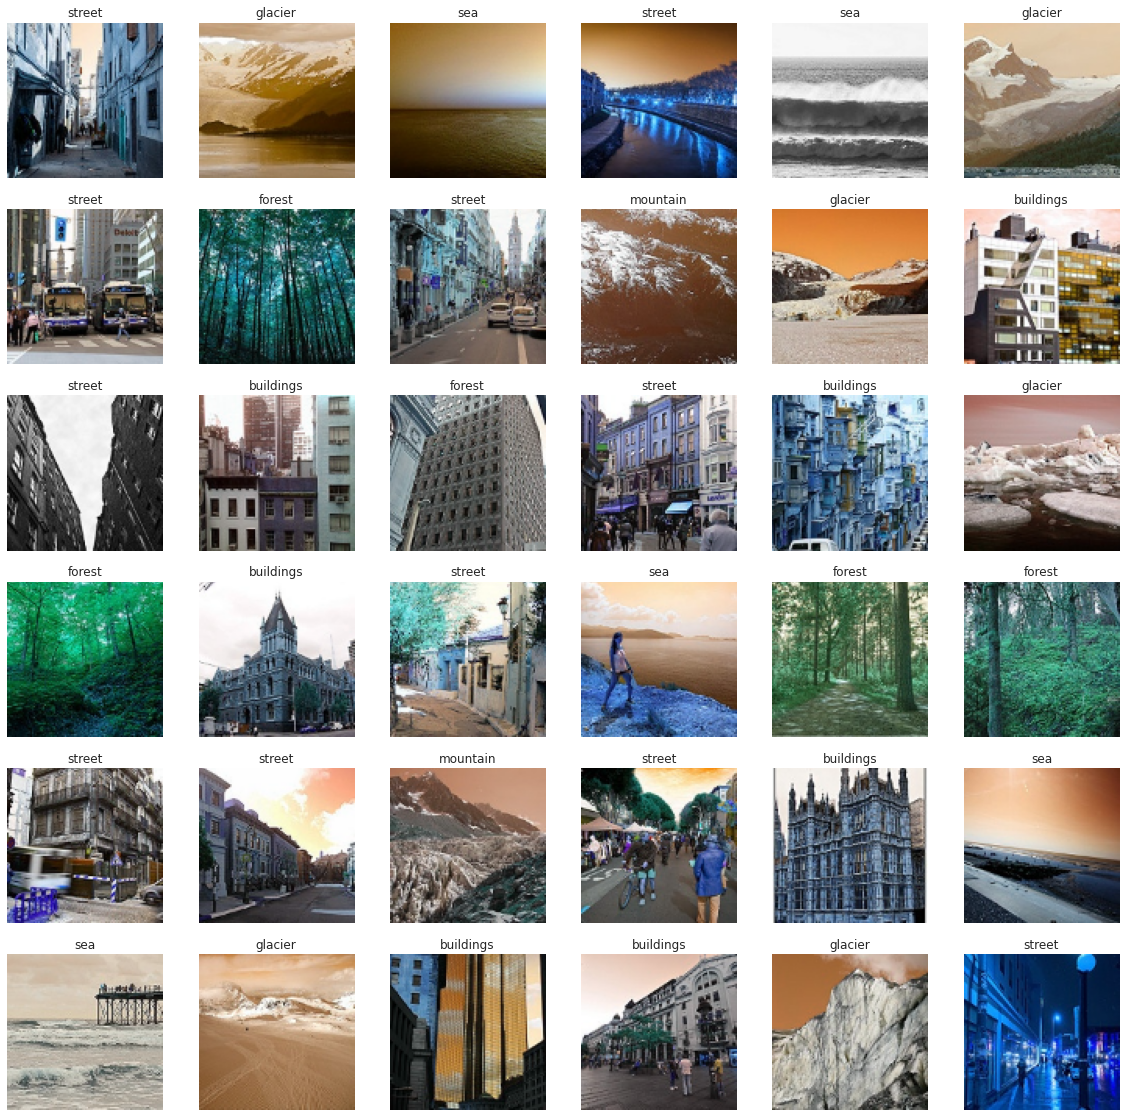

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

In [ ]:
#### BONUS POINTS FOR SOME TRANSFER LEARNING APPROACH
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model



In [ ]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (100,100,3))
for layer in base_model.layers:
  layer.trainable = False

234700800/234698864 [==============================] - 1s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(6, activation = 'softmax')(x)

In [ ]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = head_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
220/220 [==============================] - 33s 149ms/step - loss: 0.0355 - accuracy: 0.9902 - val_loss: 0.6031 - val_accuracy: 0.9060
Epoch 2/10
220/220 [==============================] - 33s 151ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.5477 - val_accuracy: 0.9053
Epoch 3/10
220/220 [==============================] - 34s 154ms/step - loss: 0.0266 - accuracy: 0.9929 - val_loss: 0.6960 - val_accuracy: 0.9040
Epoch 4/10
220/220 [==============================] - 34s 157ms/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.5765 - val_accuracy: 0.9060
Epoch 5/10
220/220 [==============================] - 35s 158ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.5725 - val_accuracy: 0.9067
Epoch 6/10
220/220 [==============================] - 35s 158ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.6455 - val_accuracy: 0.9080
Epoch 7/10
220/220 [==============================] - 35s 158ms/step - loss: 0.0337 - accuracy: 0.9915 - val_loss: 0.7467 - val_ac

In [ ]:
ModelLoss, ModelAccuracy = head_model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 7s 69ms/step - loss: 0.7803 - accuracy: 0.9057
Test Loss is 0.7802636027336121
Test Accuracy is 0.9056666493415833
